## RLab4: Tree-based Models
Tree-based model is useful for classification and regression problems where one has a set of predictor variables **X** and a single reponse **Y**. 

- Why we use tree-based models?

They are easier to interpret and discuss than linear models. Also, we do not have to worry about missing values or variable transformations. In tree-based models, we do not have to worry about recoding  categorical variables. 

In this RLab assignment, we will use **rpart** package in R. You can go over chapter 09 of HOML book to go over the details. 






## BIRTH RATE DATE
 
We will use North Carololina birth records for the year 2004. We want to  look at the relation between the habits and practices of expectant mothers and the birth of their children. The dataset is a random sample from the original dataset. 

# Predictors

- **fage**:	father’s age in years.
- **mage**:	mother’s age in years.
- **mature**:	maturity status of mother.
- **weeks**:	length of pregnancy in weeks.
- **premie**:	whether the birth was classified as premature (premie) or full-term.
- **visits**:	number of hospital visits during pregnancy.
- **marital**:	whether mother is married or not married at birth.
- **gained**:	weight gained by mother during pregnancy in pounds.
- **gender**:	gender of the baby, female or male.
- **habit**:	status of the mother as a nonsmoker or a smoker.
- **whitemom**:	whether mother is white or not white.

# Outcome variables

- **weight**:	weight of the baby at birth in pounds.  (Regression problem)
- **lowbirthweight**:	whether baby was classified as low birthweight (low) or not (not low).  (Classification problem)

In [1]:
# call the necessary packages
library(dplyr)
library(ggplot2)
library(rpart)
library(testthat)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches




In [2]:
# data is stored in a csv file, the first row contains the variable names. 
# we call our data mydata
mydata<-read.csv ("nc.csv", header=TRUE)
# let's print the data structure to have an idea of the data we are dealing with
str(mydata)


'data.frame':	999 obs. of  13 variables:
 $ fage          : int  NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int  13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int  39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int  10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int  38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num  7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not white","white": 1 1 2 2 1 1 1 1 2 2 ...


In [3]:
# Let's also take a look at the data
print(head(mydata))

# check the summary statistics 

print(summary(mydata))


  fage mage      mature weeks    premie visits marital gained weight
1   NA   13 younger mom    39 full term     10 married     38   7.63
2   NA   14 younger mom    42 full term     15 married     20   7.88
3   19   15 younger mom    37 full term     11 married     38   6.63
4   21   15 younger mom    41 full term      6 married     34   8.00
5   NA   15 younger mom    39 full term      9 married     27   6.38
6   NA   15 younger mom    38 full term     19 married     22   5.38
  lowbirthweight gender     habit  whitemom
1        not low   male nonsmoker not white
2        not low   male nonsmoker not white
3        not low female nonsmoker     white
4        not low   male nonsmoker     white
5        not low female nonsmoker not white
6            low   male nonsmoker not white
      fage            mage               mature        weeks      
 Min.   :14.00   Min.   :13.00   mature mom :132   Min.   :20.00  
 1st Qu.:25.00   1st Qu.:22.00   younger mom:867   1st Qu.:37.00  
 Median 

## Data Split

Before conducting our analyis, we will split our data into two, one for training and one for testing. In this lab assignment, use the **sample** function in **rsample** package to split your data by using the following seed:  **set.seed(1234)**

# Exercise 1:   
Bu using the **sample** function in R, split **mydata** into training and test sets by putting 70% of the data in training. Use set.seed(1234) when you do the split. Name the training set as **train_data** and the test set as **test_data**. 

In [161]:

# Exercise #1: split data into train and test sets with sample function

# your code here

set.seed(1234)
sample_size=round(nrow(mydata)*.70)
index<-sample(seq_len(nrow(mydata)), size=sample_size)
train_data <- mydata[index, ]
test_data<- mydata[-index, ]


In [162]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the train_data", {
    expect_equal( round(mean(train_data$mage)),27)})
        
test_that("Check the test_data", {
    expect_equal(  round(mean(test_data$fage, na.rm=TRUE)),30)})


print("Passed! Great  Work! Now, it is time to work on the next exercise!")

### END HIDDEN TEST

[1] "Passed! Great  Work! Now, it is time to work on the next exercise!"


## Tree-based Regression Model
First, we will use decision tree to model **weight** by using the following features:

- **fage**
- **mage**
- **mature**
- **weeks**
- **premie**
- **visits**
- **marital**
- **gained** 
- **gender**
- **habit**
- **whitemom**

# Exercise: 2
Use **rpart** function in **rpart** package to build a decision tree to estimate **weight** by using the **train_data** and name your model as **model1**. Since we construct regression trees, you need to use **method="anova"** in **rpart** function. Since **lowbirthweight** is not a predictor but another outcome variable, it should NOT be included in the set of predictors for  **weight**.

In **rpart** function, if you do not specify the parameters, the default selections will be used. Below are the some of the important parameters one can define when building decision tree with **rpart** function. 

- **na.actions**: In the handling of missing values, the default option in **rpart** is to remove only those rows for which either the response or all of the predictors are missing. We will just go with the default **na.actions** option in **model1**.

- **minsplit**: In **rpart** function, the minimum number of observations in a decision node is set to 20 by default (**minsplit=20**). We will just go with the default  **minsplit** option in **model1**. 

- **minbucket**: The minimum number of observations in a terminal node with **rpart** function is set to **minsplit/3** by default. We will just go with the default **minbucket** option in **model1**.

- **xval**:  In **rpart** function, we can decide on the number of cross validation with **xval** option. If you set **xval=0**, then no cross validation will be done. We will set **xval=0** in **model1**.

- **cp**: The threshold complexity parameter with **rpart** function is set by **cp** option. The default value of **cp** is .01 and it has been shown that this is a reasonably successful value to  ‘pre-prun’ trees. In this exercise, we will set the **cp=0.03** to have a small tree to start with. 




In [163]:
names(train_data)

[1] "fage"           "mage"           "mature"         "weeks"         
 [5] "premie"         "visits"         "marital"        "gained"        
 [9] "weight"         "lowbirthweight" "gender"         "habit"         
[13] "whitemom"

In [164]:
 #Exercise #2: Regression tree on train_data
# your code here

model1<- rpart(
  weight ~ (fage+mage+mature+weeks+premie+visits+marital+gained+gender+habit+whitemom), 
  data = train_data, 
  method = "anova",
    cp=0.03
)  
     

model1

n= 699 

node), split, n, deviance, yval
      * denotes terminal node

1) root 699 1547.73500 7.111373  
  2) weeks< 33.5 37   89.45357 3.201892 *
  3) weeks>=33.5 662  861.16500 7.329879  
    6) weeks< 37.5 142  217.91870 6.555211 *
    7) weeks>=37.5 520  534.76010 7.541423 *

In [165]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the fitted  values", {
    expect_equal( round(sum(predict(model1))),4971)})
        
test_that("Check variable importance", {
    expect_equal( round(model1$variable.importance[[1]]),706)})


print("Passed! Good work!")

### END HIDDEN TEST

[1] "Passed! Good work!"


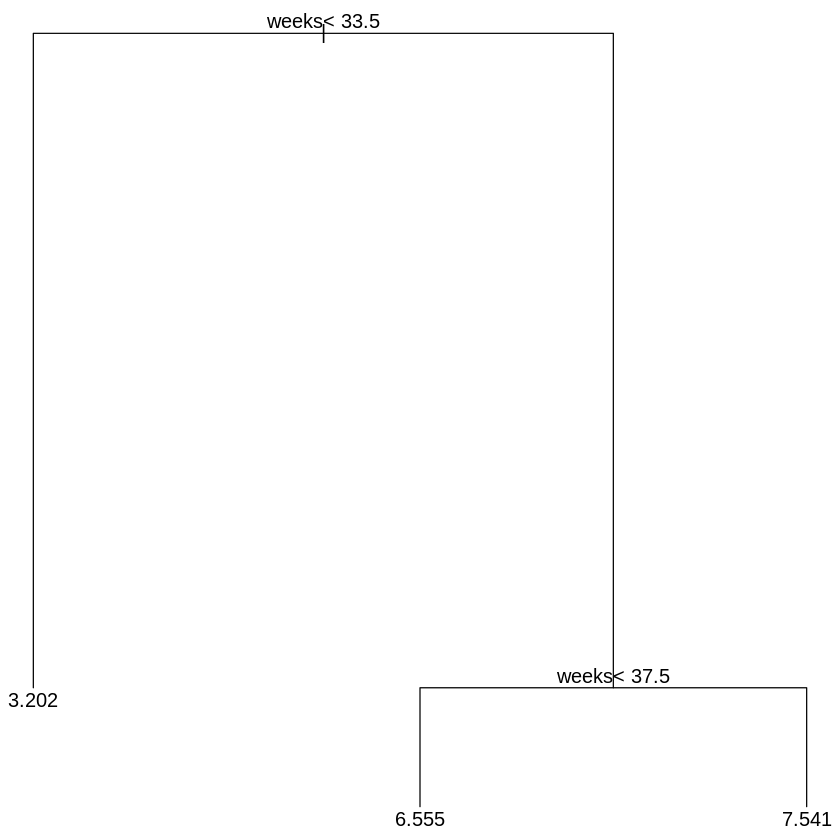

In [166]:
# Plot the regression tree based on model 1
par(mar = rep(0.1, 4))
plot(model1)
text(model1)

# Exercise 3
Now, our task it to use **model1** to predict **weight** in the **test_data**.

- By using **model1**, predict **weights** in **test_data** and name it as **pred_model1**. You can use **predict()** function for this task. 
- Calculate the mean squared error in **test_data** and name it **test_mse_model1**. Mean squared error refers to mean value of squared prediction errors. 



In [169]:

 #Exercise #3: MSE calculation
# your code here
pred_model1 <- predict(model1, test_data, type="matrix")

round(sum(predict(model1)))

test_mse_model1 <- mean((test_data$weight-pred_model1)^2)
print(test_mse_model1)

[1] 4971

[1] 1.375466


In [170]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the predicted values", {
    expect_equal( round(sum(predict(model1))),4971)})
        
test_that("Check the mse", {
    expect_equal(formatC(max(test_mse_model1 ), format = "f", digits = 1),'1.4')})


print("Passed! Excellent job!")

### END HIDDEN TEST

[1] "Passed! Excellent job!"


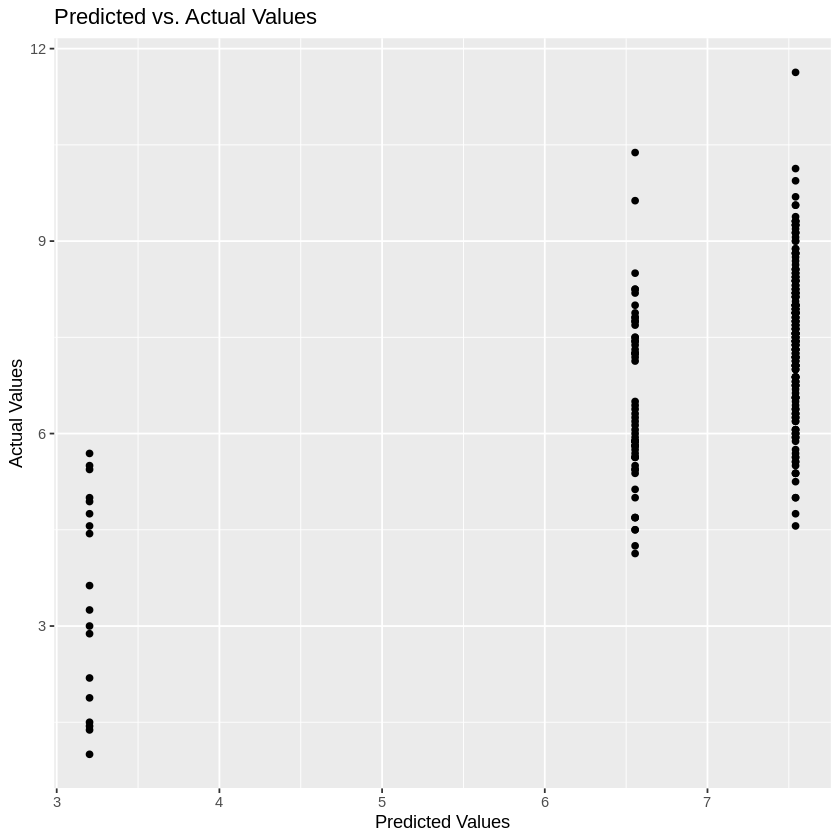

In [171]:
# Now, let's plot the actual vs predicted weights in test_data based on model1
# You have to successfully run the previous code chunks to be able to plot this one
# As can be seen from the plot, regression tree assigns the same weight to all observations that  are  in the same terminal node

pairs <- data.frame(Predicted = pred_model1,  
                       Observed = test_data$weight)


ggplot(pairs, aes(x= pred_model1, y= test_data$weight)) +
  geom_point() +
  labs(x='Predicted Values', y='Actual Values', title='Predicted vs. Actual Values')

## Prunning and Cross validation 

When growing a regression or classification tree, making it too large (complex) will overfit the data. A very simple tree, on the other hand, results in bias estimates. Hence, we can use cross validation to decide on the optimal complexity parameter, **cp**. If adding more nodes has no contribution to the overall fit, we would like to stop growing bigger trees. Theoretically,  we can set the number of terminal nodes (T) equal to the number of observations (N) which will create overfitting problem (one terminal node for each observation). By lowering the complexity parameter and using the cross validation internal results, we can choose a cost-complexity value to prune our tree.

# Exercise 4:


In this exercise, revise **model1** with the following parameters and name the new model as **model2**. 

- use 10-fold cross validation (**xval=10**)
- use complexity parameter of 0.001 (**cp=0.001**)
- use at least 4 observations in each terminal node (**minbucket=4**) 




In [172]:
 #Exercise #4: model2
# your code here
model2<- rpart(
  weight ~ (fage+mage+mature+weeks+premie+visits+marital+gained+gender+habit+whitemom), 
  data = train_data, 
  method = "anova",
    cp=0.001,
    xval=10,
    minbucket=4
)  
     

model2

n= 699 

node), split, n, deviance, yval
      * denotes terminal node

    1) root 699 1547.7350000 7.111373  
      2) weeks< 33.5 37   89.4535700 3.201892  
        4) weeks< 31.5 21   19.9803800 2.269048  
          8) weeks< 27 7    0.1731714 1.314286 *
          9) weeks>=27 14   10.2357200 2.746429  
           18) marital=married 8    2.6897500 2.282500 *
           19) marital=not married 6    3.5283500 3.365000 *
        5) weeks>=31.5 16   27.2141700 4.426250  
         10) gained>=36 5    8.0215200 3.476000 *
         11) gained< 36 11   12.6255600 4.858182 *
      3) weeks>=33.5 662  861.1650000 7.329879  
        6) weeks< 37.5 142  217.9187000 6.555211  
         12) weeks< 36.5 70  123.9101000 6.253286  
           24) visits< 10.5 25   30.7410200 5.654400  
             48) weeks< 34.5 7    8.6797430 4.912857 *
             49) weeks>=34.5 18   16.7151600 5.942778  
               98) gained>=36 4    2.2121000 5.205000 *
               99) gained< 36 14   11.7037200 6.

In [173]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the findings", {
    expect_equal( formatC(model2$cptable[[2]], format = "f", digits = 3),'0.070')})



print("Passed! Good work! ")

### END HIDDEN TEST

[1] "Passed! Good work! "


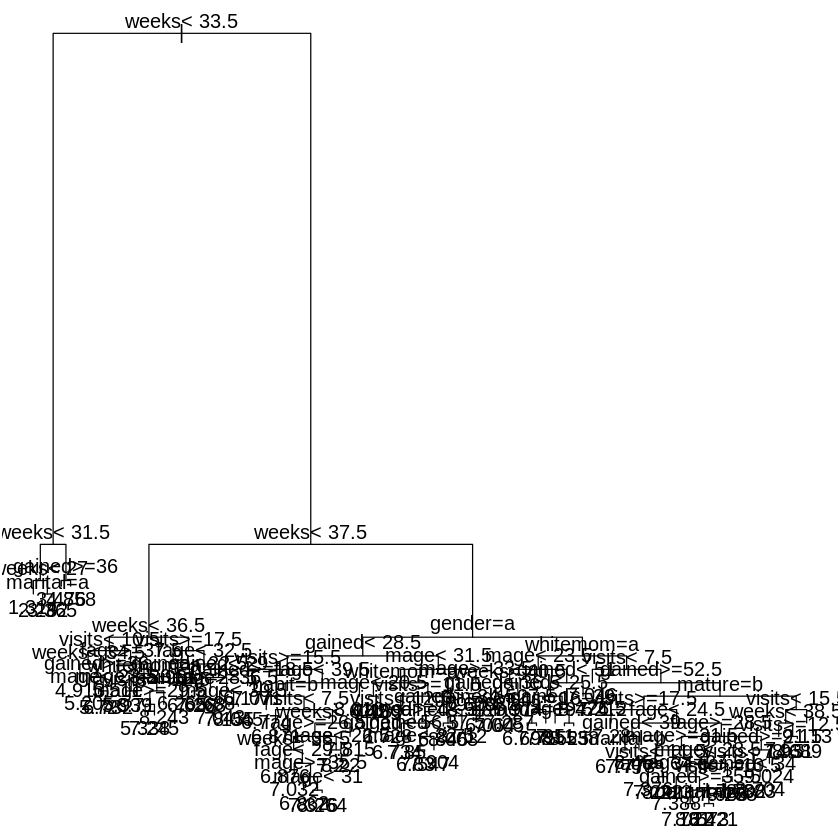

In [174]:
# lowering cp value and minbucket helps us to grow a bigger tree. 
# Let's check to see how big our tree has grown
par(mar = rep(0.1, 4))
plot(model2)
text(model2)

# Prunning

When we do cross-validation,  we are specifically interested in cross-validated errors. **printcp(model2)** code displays the complexity parameter (CP) table for fitted Rpart Object **model2**. We look at the **xerror** column in the CP table to decide on the optimal **cp** value to prune our tree. In this exercise, we will prune a decision tree using the cp of smallest tree with the smallest **xerror**. 

As shown below, **xerror** takes the smallest value with 3 number of splits at **cp=0.0141237**. If your CP table produces a different cp value at the lowest **xerror**, still use **cp=0.0141237** to have your code pass the test. 




In [175]:

# the following code will print the cross-validated results
# 
# We look for the minimum **xerror** value to decide on the cp value for prunning
# 
printcp(model2)



Regression tree:
rpart(formula = weight ~ (fage + mage + mature + weeks + premie + 
    visits + marital + gained + gender + habit + whitemom), data = train_data, 
    method = "anova", cp = 0.001, xval = 10, minbucket = 4)

Variables actually used in tree construction:
 [1] fage     gained   gender   habit    mage     marital  mature   visits  
 [9] weeks    whitemom

Root node error: 1547.7/699 = 2.2142

n= 699 

          CP nsplit rel error  xerror     xstd
1  0.3858003      0   1.00000 1.00314 0.084769
2  0.0700934      1   0.61420 0.63476 0.039087
3  0.0273038      2   0.54411 0.55628 0.033237
4  0.0141237      3   0.51680 0.55507 0.032925
5  0.0085716      4   0.50268 0.53822 0.032505
6  0.0082358      6   0.48554 0.54927 0.033924
7  0.0067159      7   0.47730 0.55370 0.034156
8  0.0066152     11   0.45044 0.56180 0.035873
9  0.0061842     12   0.44382 0.56322 0.035964
10 0.0055960     13   0.43764 0.55688 0.035390
11 0.0050151     14   0.43204 0.55473 0.034692
12 0.0045629    

## Exercise 5

- Prune **model2** by setting **cp=0.0141237** and name the pruned rpart object as **model2_pruned**. You can use **prune()** function for this task. 

- By using **model2_pruned**, predict **weights** in **test_data** and name it as **pred_model2_pruned**. You can use **predict()** function for this task. 
- Calculate the mean squared error in **test_data** and name it **test_mse_model2_pruned**. Mean squared error refers to mean value of squared prediction errors. 

In [176]:
 #Exercise #5: prune model2 and calculate mse 
# your code here
model2_pruned <- prune(model2, cp=0.0141237)

pred_model2_pruned <- predict(model2_pruned, test_data, type="matrix")
test_mse_model2_pruned <- mean((test_data$weight-pred_model2_pruned)^2)
test_mse_model2_pruned

[1] 1.322298

In [177]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the findings", {
    expect_equal(round(min(pred_model2_pruned)),2)
    expect_equal(round(mean(pred_model2_pruned)),7)
    expect_equal( round(max(pred_model2_pruned)),8)
   expect_equal( round(test_mse_model2_pruned*21.765),29)})

print("Passed! Good work! ")

### END HIDDEN TEST

[1] "Passed! Good work! "


## Tree-based Classification Model

In this section, we will model **lowbirthweight** outcome varible. According to data, **lowbirthweight** captures whether baby was classified as low birthweight (low) or not (not low).


We will use decision tree to model **lowbirthweight** by using the following features:

- **fage**
- **mage**
- **mature**
- **weeks**
- **premie**
- **visits**
- **marital**
- **gained** 
- **gender**
- **habit**
- **whitemom**

# Exercise: 6

Use **rpart** function in **rpart** package to build a classification tree to estimate **lowbirthweight** by using the **train_data** and name your model as **model3**. Since we construct classification tree, you need to use **method="class"** in **rpart** function. Since **weight** is not a predictor but another outcome variable, it should NOT be included in the set of predictors for  **lowbirthweight**.

Since we have a classification problem, we need to use a purity measure in finding the best split. By default, **rpart** uses **gini impurity** to select splits when performing classification. We will go with the default selection.

In **rpart** function, if you do not specify the parameters, the default selections will be used. In this exercise, use the following parameters in  **model2**.

- use 10-fold cross validation (xval=10)
- use complexity parameter of 0.00001 (cp=0.00001)
- use at least 4 observations in each terminal node (minbucket=4)




In [178]:
 #Exercise #6: Classification tree on train_data
# your code here

model3<- rpart(
  lowbirthweight ~ (fage+mage+mature+weeks+premie+visits+marital+gained+gender+habit+whitemom), 
  data = train_data, 
  method = "class",
    cp=0.00001,
    xval=10,
    minbucket=4
)  
     

model1


n= 699 

node), split, n, deviance, yval
      * denotes terminal node

1) root 699 1547.73500 7.111373  
  2) weeks< 33.5 37   89.45357 3.201892 *
  3) weeks>=33.5 662  861.16500 7.329879  
    6) weeks< 37.5 142  217.91870 6.555211 *
    7) weeks>=37.5 520  534.76010 7.541423 *

In [179]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the findings", {
    expect_equal(round(sort(model3$variable.importance)[[3]]),1)
   expect_equal(formatC(model3$cptable[[2]], format = "f", digits = 3),'0.023')})

print("Passed! Good work! ")

### END HIDDEN TEST

[1] "Passed! Good work! "


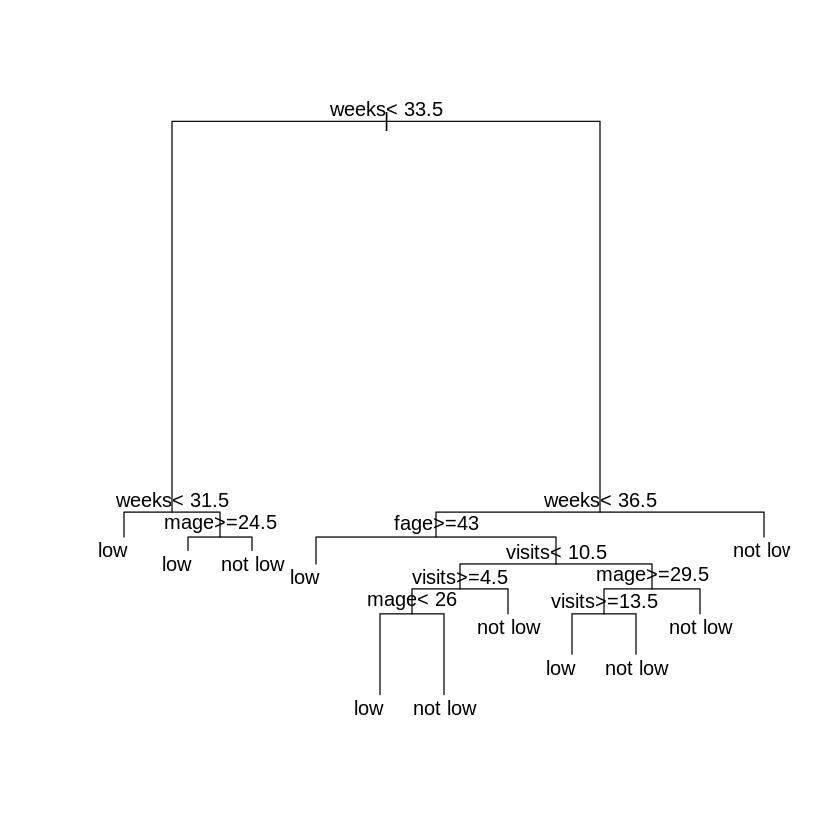

In [180]:
# let's visualize the classificaton tree based on model3
plot(model3)
text(model3)


# Predict class probabilities and labels

Now, our task it to use model3 to predict **lowbirthweight** labels in the **test_data**. We will both calculate the probabilities and the  **lowbirthweight** labels such as "low" and "not low"

# Exercise 7

- By using model3, predict **probabilities** of **lowbirthweight** labels in **test_data** and store them as  **prob_lowbirthweight**. You can use predict() function for this task and select type="prob" to extract probabilities.
- By using model3, predict **lowbirthweight** labels ("low", "not low") in **test_data** and store them as  **class_lowbirthweight**. You can use predict() function for this task and select type="class" to extract probabilities.


In [183]:

 #Exercise #7:  predict probabilities and labels in test_data based on model3
# your code here

prob_lowbirthweight <- predict(model3, test_data, type="prob")

class_lowbirthweight <- predict(model3, test_data, type="class")

In [184]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the findings", {
    expect_equal(prob_lowbirthweight[[1]],0.0287162162162162)
   expect_equal(prob_lowbirthweight[[23]],1)
    expect_equal(as.integer(class_lowbirthweight[87]),2)
    
})

print("Passed! Good work! ")

### END HIDDEN TEST

[1] "Passed! Good work! "


## Create your own Confusion Matrix

In this exercise, we will use **model3** and calculate  the confusion matrix by comparing actual and predicted **lowbirthweight** labels in the **test_data**. 

Use the following definitions when you are working on the following two exercises.

- "low" is a positive class
- "not low" is a negative class

- **True Positive**: Model correctly predicts the positive class: The new-born baby has **lowbirthweight** status of "low" and **model3** predicts the  new-born baby as "low" in the **test_data**.
- **False Positive**: Model inccorrectly predicts the positive class: The new-born baby has **lowbirthweight** status of "not low" and **model3** predicts the  new-born baby as "low" in the **test_data**.
- **True Negative**: Model correctly predicts the negative class:The new-born baby has **lowbirthweight** status of "not low" and **model3** predicts the  new-born baby as "not low" in the **test_data**.
- **False Negative**: Model inccorrectly predicts the negative class: The new-born baby has **lowbirthweight** status of "low" and **model3** predicts the  new-born baby as "not low" in the **test_data**.

# Exercise 8
- Calculate the total number of true positives in **test_data** and name it **TP**
- Calculate the total number of false positives in **test_data** and name it **FP**
- Calculate the total number of true negatives in **test_data** and name it **TN**
- Calculate the total number of false negatives in **test_data** and name it **FN**


In [195]:
 #Exercise #8:  confusion matrix in test_data based on model3
# your code here

table(class_lowbirthweight, test_data$lowbirthweight)

TP <- 16
FP <- 5
TN <- 256
FN <- 23

                    
class_lowbirthweight low not low
             low      16       5
             not low  23     256

In [196]:

# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the confusion matrix findings", {
    expect_equal(TP*FP,80)
   expect_equal(TN*FN,5888)
    expect_equal(TP-FP+TN-FN,244)
    expect_equal(TN/FP,51.2)

})

print("Passed! Good work! ")

### END HIDDEN TEST


[1] "Passed! Good work! "


## Performance Measures 

By using **model3** predictons  of **test_data** labels (stored as **class_lowbirthweight** above) or the confusion matrix entries (**TP**, **FP**, **TN**, **FN**), calculate the following performance measures.

# Exercise 9

- Calculate accuracy and name it as **accuracy**
- Calculate precision and name it as **precision**
- Calculate sensitivity and name it as **sensitivity**
- Calculate specificity and name it as **specificity**







In [197]:
 #Exercise #9:  calculate performance measures
# your code here

accuracy <- (TP + TN) / (TN + TP + FN + FP)

precision <- TP / (TP + FP)

sensitivity <- TP / (TP +FN)

specificity <- TN / (TN + FP)

In [198]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the performance measures", {
    expect_equal(formatC(accuracy, format = "f", digits = 2),'0.91')
   expect_equal(formatC(precision*sensitivity),'0.3126')
    expect_equal(round((1+specificity)*143), 283)
    expect_equal(formatC(specificity*accuracy),'0.8893')

})

print("Passed! Good work! ")

### END HIDDEN TEST

[1] "Passed! Good work! "
